In [1]:
import os
import numpy as np
import torch
import glob
import random
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
imgs_ext = ['*.png', '*.jpeg', '*.jpg']
txt_ext = ['*.txt']
imgs_dir = os.path.join(os.getcwd(), 'dataset/imgs')
txt_dir = os.path.join(os.getcwd(), 'dataset/txt')
imgs_paths = []
txt_paths = []
os.makedirs(imgs_dir, exist_ok=True)
os.makedirs(txt_dir, exist_ok=True)

In [3]:
for ext in imgs_ext:
    imgs_paths.extend(Path(imgs_dir).glob(ext))

for ext in txt_ext:
    txt_paths.extend(Path(txt_dir).glob(ext))
    
# for txt in txt_paths:
#     os.rename(txt, f"dataset/txt/{str(txt).split('/')[-1]}")

# for img in imgs_paths:
#     os.rename(img, f"dataset/imgs/{str(img).split('/')[-1]}")

In [4]:
def checking_mapping(imgs_paths: list, txt_paths: list):
    """
    Checking if every image have corresponding txt file and vice versa
    """
    assert len(imgs_paths) == len(txt_paths), 'The number of pictures and text files must be the same'
    imgs_files = [str(i).split('/')[-1].split('.')[0] for i in imgs_paths]
    txt_files = [str(i).split('/')[-1].split('.')[0] for i in txt_paths]    
    assert set(imgs_files) - set(txt_files) == set(txt_files) - set(imgs_files), 'Every images must have corresponding txt file'
    
    return imgs_files, txt_files
imgs_files, txt_files = checking_mapping(imgs_paths, txt_paths)

In [5]:
def yolo2pil_coords(x, y, w, h, img_size):
    x0 = x - w/2
    y0 = y - h/2
    
    x1 = x + w/2
    y1 = y + h/2
    
    return (x0*img_size[0], y0*img_size[1], x1*img_size[0], y*img_size[1])

In [6]:
def coords2float(filename: str):
    """
    Transforms coords to float numbers
    """
    float_coords = []
    with open(filename, 'r') as f: coords = f.readlines()
    coords = [i.strip('\n').split(' ')[1:] for i in coords]

    for _ in coords:
        float_coords.append(list(float(x) for x in _))
    return float_coords


In [7]:
def expand_coords(pil_coords: list, img_size, sigma=0.05):
    x_sigma = img_size[0] * sigma 
    y_sigma = img_size[1] * sigma 
    
    x0 = pil_coords[0] - x_sigma
    y0 = pil_coords[1]  - y_sigma
    
    x1 = pil_coords[2] + x_sigma
    y1 = pil_coords[3]  + y_sigma
    
    return [x0, y0, x1, y1]    

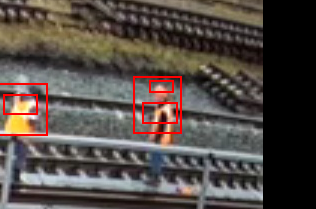

In [ ]:
samples = random.choices(imgs_files, k=2)

for indx, sample in enumerate(samples):
    img_path = os.path.join(imgs_dir, '{}.{}'.format(sample, 'jpg'))
    coords_path = os.path.join(txt_dir, '{}.{}'.format(sample, 'txt'))
    im = Image.open(img_path)
    draw = ImageDraw.Draw(im)
    coords = coords2float(coords_path)
    
    cropped_list = []
    for _ in coords:
        c = yolo2pil_coords(*_, im.size)
        draw.rectangle(c, outline=(255, 0, 0), width=2)
        crop = im.crop(expand_coords(c, im.size, sigma=0.07)) 
    crop.show()
    im.resize((960, 512)).show()                               

## As we can see, the goal of our object detection system is to correctly detect workers, their reflective vest and safety helmet
